# Module 6 Assignment 1: Digit Recognizer

**Reed Ballesteros**

**MSDS-422**

**5/8/2022**

**Instructor: Prof. Noah Gift**

## Digit Recognizer

### Background Materials
The classic MNIST Digit Recognizer (https://www.kaggle.com/competitions/digit-recognizer) problem is a competition on Kaggle.com, and you will compete in this competition. For this assignment, you will develop a classifier that may be used to predict which of the 10 digits is being written.  

## Management/Research Question
In layman’s terms, what is the management/research question of interest, and why would anyone care?  

Requirements
- Fit a random forest classifier using the full set of explanatory variables and the model training set (csv).
- Record the time it takes to fit the model and then evaluate the model on the csvdata by submitting to Kaggle.com. Provide your Kaggle.com score and user ID.
- Execute principal components analysis (PCA) on the combined training and test set data together, generating principal components that represent 95 percent of the variability in the explanatory variables. The number of principal components in the solution should be substantially fewer than the explanatory variables.
- Record the time it takes to identify the principal components.
- Using the identified principal components from step (2), use thecsvto build another random forest classifier.
- Record the time it takes to fit the model and to evaluate the model on the csvdata by submitting to Kaggle.com. Provide your Kaggle.com score and user ID.
- Use k-means clustering to group MNIST observations into 1 of 10 categories and then assign labels.  (Follow the example here if needed: kmeans mnist.pdf). kmeans mnist-2.pdf  Download kmeans mnist-2.pdf 
- Submit the RF Classifier, the PCA RF, and k-means estimations to Kaggle.com, and provide screen snapshots of your scores as well as your Kaggle.com user name.
- The experiment we have proposed has a major design flaw. Identify the flaw. Fix it. Rerun the experiment in a way that is consistent with a training-and-test regimen, and submit this to Kaggle.com. 
- Report total elapsed time measures for the training set analysis. It is sufficient to run a single time-elapsed test for this assignment. In practice, we might consider the possibility of repeated executions of the relevant portions of the programs, much as the Benchmark Example programs do. Some code that might help you with reporting elapsed total time follows. 

<center>start=datetime.now()</center>
<center>rf2.fit(trainimages,labels)</center>
<center>end=datetime.now()</center>
<center>print(end-start)</center>

### Libraries to be loaded

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

## Ingest

In [2]:
train_df = pd.read_csv("train.csv")
train_df.shape

(42000, 785)

In [3]:
train_df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [4]:
test_df = pd.read_csv("test.csv")
test_df.shape

(28000, 784)

In [5]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## EDA

In [6]:
train_df_X = train_df.copy()
train_df_y = train_df_X['label']
train_df_X.drop(['label'], axis=1, inplace=True)


In [7]:
train_df_X.shape

(42000, 784)

In [8]:
train_df_y.shape

(42000,)

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


There are no null values in the training or test data.

In [10]:
train_df_X.isna().sum().sum()

0

In [11]:
train_df_y.isna().sum()

0

In [12]:
test_df.isna().sum().sum()

0

Let's output some sample digits as a 28x28 pixel image.

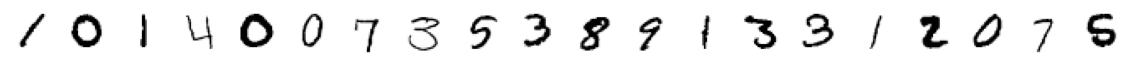

In [13]:
# there are 784 features pixels for each sample, sqrt(784) = 28
# each sample represents a 28x28 image of a digit, need to reshape
train_df_X_img = train_df_X.values.reshape(-1,28,28,1)

num_examples = 20
plt.figure(figsize=(20,20))
for i in range(num_examples):
    plt.subplot(1, num_examples, i+1)
    plt.imshow(train_df_X_img[i], cmap='Greys')
    plt.axis('off')
plt.show()

Let's look at the distribution of digits in the training set.

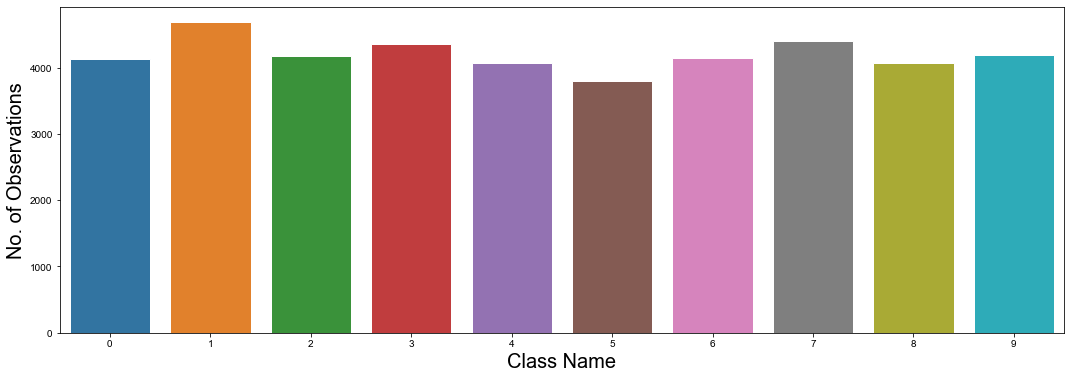

In [14]:
ax = plt.subplots(figsize=(18, 6))
sns.set_style("whitegrid")
sns.countplot(x='label', data=train_df);
plt.ylabel("No. of Observations", size=20);
plt.xlabel("Class Name", size=20);

## Modelling

Let's split train.csv 80/20 into training and validation datasets.

In [15]:
X_train,X_val,y_train,y_val=train_test_split(train_df_X,train_df_y,test_size=0.2,random_state=42)

## Random Forest Classifier
Fit a random forest classifier using the full set of explanatory variables and the model training set (csv). Record the time it takes to fit the model.

In [16]:
start=datetime.now()
rfc_model = RandomForestClassifier(random_state=42)
rfc_model.fit(X_train,y_train)
end=datetime.now()
print(end-start)

0:00:16.266169


In [17]:
start=datetime.now()
y_pred = rfc_model.predict(X_val)
end=datetime.now()
print(end-start)
print('accuracy score = ', accuracy_score(y_val,y_pred))

0:00:00.242996
accuracy score =  0.9628571428571429


In [18]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       816
           1       0.98      0.99      0.99       909
           2       0.96      0.96      0.96       846
           3       0.96      0.95      0.96       937
           4       0.96      0.97      0.96       839
           5       0.96      0.96      0.96       702
           6       0.96      0.98      0.97       785
           7       0.97      0.95      0.96       893
           8       0.95      0.95      0.95       835
           9       0.93      0.94      0.94       838

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



Visually compare a small sample of the vaildation data (X_val) to the predicted labels (y_pred) to the actual labels (y_val).

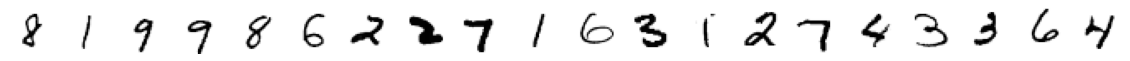

In [19]:
X_val_img = X_val.values.reshape(-1,28,28,1)

num_examples = 20
plt.figure(figsize=(20,20))
for i in range(num_examples):
    plt.subplot(1, num_examples, i+1)
    plt.imshow(X_val_img[i], cmap='Greys')
    plt.axis('off')
plt.show()

In [20]:
y_pred[0:20]

array([8, 1, 9, 9, 8, 6, 2, 2, 7, 1, 6, 3, 1, 2, 7, 4, 3, 3, 6, 4],
      dtype=int64)

In [21]:
y_val[0:20]

5457     8
38509    1
25536    9
31803    9
39863    8
30639    6
12986    2
41067    2
30743    7
6839     1
17164    6
21723    3
12272    1
5030     2
25222    7
34680    4
4976     3
19565    3
27947    6
31133    4
Name: label, dtype: int64

### Submission

Evaluate the model on the csvdata by submitting to Kaggle.com. Provide your Kaggle.com score and user ID.

In [22]:
start=datetime.now()
y = rfc_model.predict(test_df)
end=datetime.now()
print(end-start)

0:00:00.832001


In [23]:
# create submission file
submission = pd.DataFrame({"ImageId": (test_df.index + 1),"Label": y})
submission.to_csv('submission.csv', index=False)

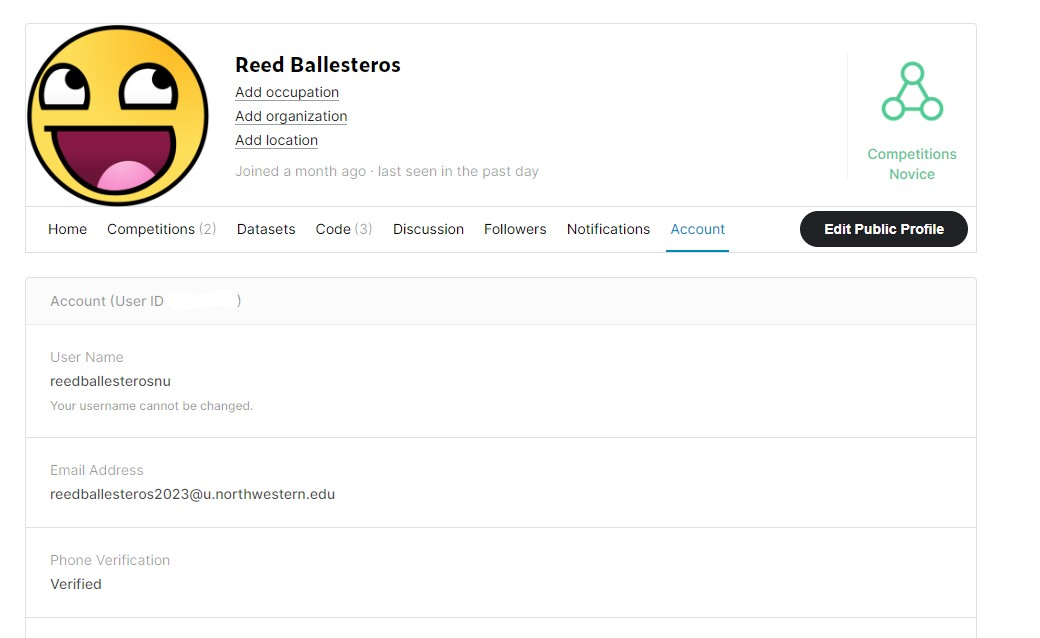



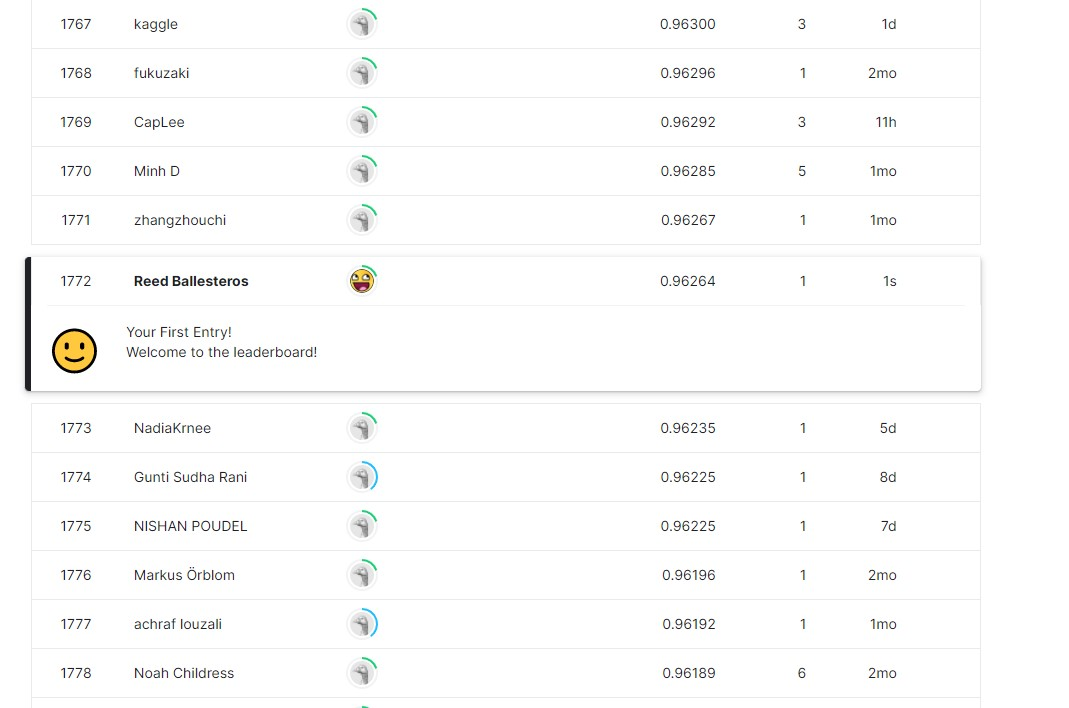

### PCA 

Execute principal components analysis (PCA) on the combined training and test set data together, generating principal components that represent 95 percent of the variability in the explanatory variables. The number of principal components in the solution should be substantially fewer than the explanatory variables.

Record the time it takes to identify the principal components.

In [24]:
start=datetime.now()
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
pca_n_components = np.argmax(cumsum >= 0.95) + 1
end=datetime.now()
print('Time: ', end-start)
print('# PCA Components at 95% variability: ', pca_n_components)

Time:  0:00:02.024654
# PCA Components at 95% variability:  153


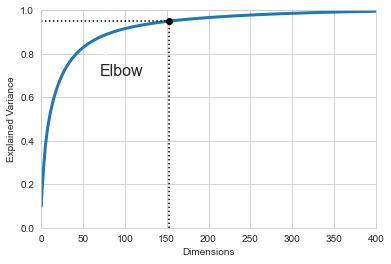

In [25]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([pca_n_components, pca_n_components], [0, 0.95], "k:")
plt.plot([0, pca_n_components], [0.95, 0.95], "k:")
plt.plot(pca_n_components, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

In [26]:
start=datetime.now()
pca = PCA(n_components=pca_n_components)
X_train_pca = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_train_pca)
end=datetime.now()
print('Time: ', end-start)

Time:  0:00:01.839014


In [27]:
# EXTRA
def plot_digits(instances, images_per_row=4, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Text(0.5, 1.0, 'Compressed')

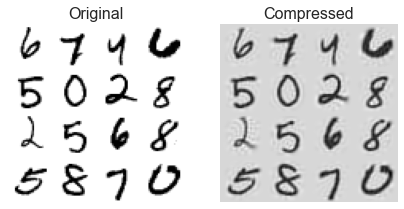

In [28]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)


### PCA Random Forest Classifier

In [29]:
start=datetime.now()
pca = PCA(n_components=pca_n_components)
X_train_pca = pca.fit_transform(X_train)
end=datetime.now()
print(end-start)

0:00:01.619112


Using the identified principal components from step (2), use train.csv to build another random forest classifier.
Record the time it takes to fit the model.

In [30]:
start=datetime.now()
rfc_model_pca = RandomForestClassifier(random_state=42)
rfc_model_pca.fit(X_train_pca,y_train)
end=datetime.now()
print(end-start)

0:00:37.207336


In [31]:
start=datetime.now()
X_val_pca = pca.transform(X_val)
y_pred_pca = rfc_model_pca.predict(X_val_pca)
end=datetime.now()
print(end-start)
print('accuracy score = ', accuracy_score(y_val,y_pred_pca))

0:00:00.296502
accuracy score =  0.9402380952380952


In [32]:
print(classification_report(y_val, y_pred_pca))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       816
           1       0.98      0.99      0.98       909
           2       0.95      0.94      0.94       846
           3       0.91      0.91      0.91       937
           4       0.94      0.94      0.94       839
           5       0.90      0.92      0.91       702
           6       0.95      0.97      0.96       785
           7       0.96      0.95      0.95       893
           8       0.92      0.90      0.91       835
           9       0.91      0.92      0.92       838

    accuracy                           0.94      8400
   macro avg       0.94      0.94      0.94      8400
weighted avg       0.94      0.94      0.94      8400



Visually compare a small sample of the vaildation data (X_val) to the predicted labels (y_pred_pca) to the actual labels (y_val).

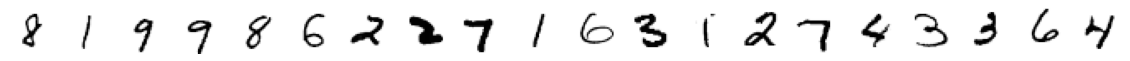

In [33]:
X_val_img = X_val.values.reshape(-1,28,28,1)

num_examples = 20
plt.figure(figsize=(20,20))
for i in range(num_examples):
    plt.subplot(1, num_examples, i+1)
    plt.imshow(X_val_img[i], cmap='Greys')
    plt.axis('off')
plt.show()

In [34]:
y_pred_pca[0:20]

array([8, 1, 9, 9, 8, 6, 2, 2, 7, 1, 6, 3, 1, 2, 7, 4, 3, 3, 6, 4],
      dtype=int64)

In [35]:
y_val[0:20]

5457     8
38509    1
25536    9
31803    9
39863    8
30639    6
12986    2
41067    2
30743    7
6839     1
17164    6
21723    3
12272    1
5030     2
25222    7
34680    4
4976     3
19565    3
27947    6
31133    4
Name: label, dtype: int64

### Submission

Evaluate the model on the csvdata by submitting to Kaggle.com. Provide your Kaggle.com score and user ID.

In [36]:
start=datetime.now()
test_df_pca = pca.transform(test_df)
y = rfc_model_pca.predict(test_df_pca)
end=datetime.now()
print(end-start)

0:00:00.889996


In [37]:
# create submission file
submission = pd.DataFrame({"ImageId": (test_df.index + 1),"Label": y})
submission.to_csv('submission.csv', index=False)

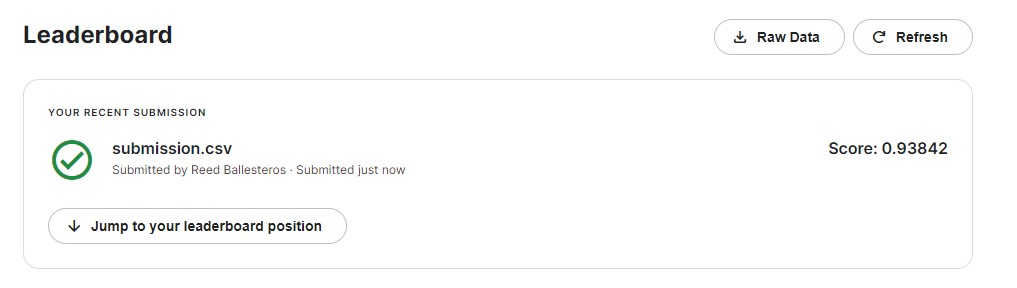

### K-Means Classifier


Use k-means clustering to group MNIST observations into 1 of 10 categories and then assign labels.

In [38]:
start=datetime.now()
kmeans = KMeans(n_clusters=10)
#kmeans = MiniBatchKMeans(n_clusters=10) # super-fast, but has memory leaks and not as accurate
kmeans.fit(X_train)
kmeans.labels_
end=datetime.now()
print(end-start)

0:00:11.835618


Let's compare the training set items in the kmeans model to their respective label. 

In [39]:
y_train_clusters = pd.DataFrame(kmeans.labels_, columns=["Cluster"])
y_train_clusters['Label'] = y_train.tolist()
y_train_clusters

,Cluster,Label
0,7,6
1,9,5
2,5,3
3,4,4
4,4,7
...,...,...
33595,8,9
33596,4,9
33597,2,2
33598,7,6


Let's identify the clusters by picking the label it is most associated with.

In [40]:
pd.crosstab(y_train_clusters['Cluster'],y_train_clusters["Label"])

Label,0,1,2,3,4,5,6,7,8,9
Cluster,,,,,,,,,,
0,2663,0,35,22,2,39,52,6,18,19
1,15,1623,231,39,135,413,115,141,229,54
2,38,3,117,59,1224,111,220,374,59,836
3,0,2123,167,208,51,75,147,110,130,71
4,4,3,21,68,861,156,0,1343,118,1352
5,140,5,211,2163,0,1054,15,2,762,41
6,15,3,2354,108,6,6,52,18,22,4
7,113,5,92,42,66,61,2668,4,27,7
8,12,4,39,17,880,153,1,1509,135,943


The cluster and label association is shown below, but based on the crosstab data above not all labels will be used. In this case, labels 5 and 9 will not be used for prediction as they came up short in any cluster compared to other labels.

In [41]:
key = y_train_clusters.groupby('Cluster').agg(lambda x:x.value_counts().index[0])
key 

,Label
Cluster,
0,0
1,1
2,4
3,1
4,9
5,3
6,2
7,6
8,7


In [42]:
y_train_labels = []
for i in range(0,len(kmeans.labels_)):
    x = kmeans.labels_[i]
    y_train_labels += [key['Label'].loc[x]]

print(classification_report(y_train, y_train_labels))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      3316
           1       0.62      0.99      0.76      3775
           2       0.91      0.71      0.80      3331
           3       0.49      0.63      0.55      3414
           4       0.40      0.38      0.39      3233
           5       0.00      0.00      0.00      3093
           6       0.86      0.80      0.83      3352
           7       0.41      0.43      0.42      3508
           8       0.44      0.54      0.48      3228
           9       0.34      0.40      0.37      3350

    accuracy                           0.58     33600
   macro avg       0.54      0.57      0.55     33600
weighted avg       0.55      0.58      0.55     33600



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Let's test the kmeans model with the validation data.

In [43]:
y_val_pred = kmeans.predict(X_val)
y_val_pred

array([1, 3, 4, ..., 5, 0, 2])

Predictions will leave out 5 and 9 in this test as well.

In [44]:
y_val_labels = []
for i in range(0,len(y_val_pred)):
    x = y_val_pred[i]
    y_val_labels += [key['Label'].loc[x]]

print(classification_report(y_val, y_val_labels))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86       816
           1       0.63      1.00      0.77       909
           2       0.89      0.70      0.78       846
           3       0.51      0.64      0.57       937
           4       0.42      0.37      0.40       839
           5       0.00      0.00      0.00       702
           6       0.84      0.79      0.82       785
           7       0.44      0.46      0.45       893
           8       0.45      0.52      0.48       835
           9       0.34      0.43      0.38       838

    accuracy                           0.58      8400
   macro avg       0.55      0.57      0.55      8400
weighted avg       0.55      0.58      0.56      8400



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Submission

In [45]:
Kmeans_pred = kmeans.predict(test_df)

test_labels = []
for i in range(0,len(Kmeans_pred)):
    x = Kmeans_pred[i]
    test_labels += [key['Label'].loc[x]]

In [46]:
# create submission file
submission = pd.DataFrame({"ImageId": (test_df.index + 1),"Label": test_labels})
submission.to_csv('submission.csv', index=False)

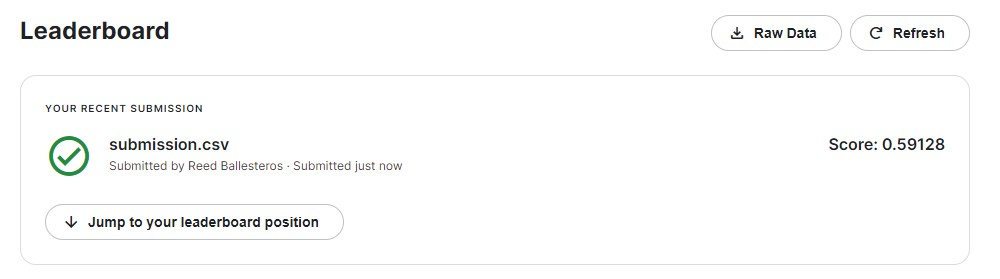

As expected, since labels 5 and 9 are not part of the prediction model we'll get a low Kaggle score.

### Design Flaw

TBA

### Submission

## Conclusion